# Reveal the Best and Worst Star Wars Movie Based on a Survey

## Table of Contents

1. [**Introduction**](#introduction)
    - Data Description
2. [**Acquiring and Loading Data**](#loading_data)
	- Read in the Data
3. [**Data Cleaning**](#data_cleaning)
    - Rename Columns
    - Convert Values
    - Split Columns
    - Remove Wrong Data
4. [**Data Analysis & Visualization**](#analysis)
    - View Count and Overall Ratings
    - Explore the Responses of Various Groups of Respondents
    - Explore How Favorably Respondents View the Characters
5. [**Conclusion**](#conclusion)

<a id='introduction'></a>
# Introduction

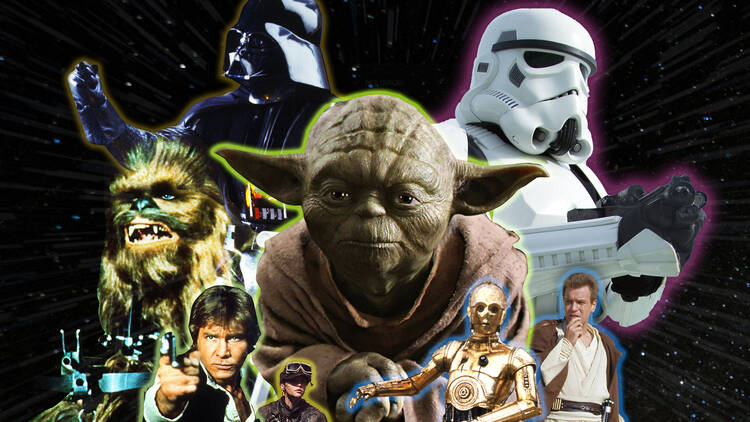

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey.

In this project we are going to explore this survey and answer the question 'Which Star Wars movie is the best?'.

### Data Description
This dataset contains the results of a survey of Star Wars fans. You can download this dataset from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

Here are some of the columns present in this dataset.


* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location (Census Region)` — the respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` — a `Yes` or `No` response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` — a `Yes` or `No` response


<a id='loading_data'></a>
# Acquiring and Loading Data

## Read in and Explore the Data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

We'll start by reading in the data we'll be using in this project.

In [2]:
star_wars = pd.read_csv('data/StarWars.csv', encoding='ISO-8859-1')
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Here are the first five rows of this dataset.

Let's take a look at the dataset info to initialize our first steps.

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

We have many `'Unnamed'` columns here. There are also columns such as `'Gender'`, `'Education'` and `'Location (Census Region)'`. We also want to check the next 2 columns: `'Have you seen any of the 6 films in the Star Wars franchise?'` and `'Do you consider yourself to be a fan of the Star Wars film franchise?'`.

Let's first take a look at the last 2 columns we have mentioned before.

In [4]:
star_wars[star_wars.columns[1:3]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,Yes,Yes
1,No,NaN
2,Yes,No
3,Yes,Yes
4,Yes,Yes


In these columns we have `Yes` and `No` values. We can change them to more a intuitive `bool` `datatype`.

Now, let's take a look at the first bunch of the unnamed columns.

In [5]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


These columns store the answers to the question `'Which of the following Star Wars movies have you seen?'`. We can change the names of the columns to something more readable, like `'seen_1'`, `'seen_2'`, etc.

Let's continue with the second bunch of the unnamed columns.

In [6]:
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


These columns represent the user's ranking of each movie from first to sixth. We will change the names of these columns to something clearer, like `'ranking_1'`, `'ranking_2'`, and so on.

Now, let's take a look at the third bunch of the unnamed columns.

In [7]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


These columns indicate how users view each of the Star Wars characters, either favorably, unfavorably, or unfamiliarly. We should change the names of these columns to Star Wars character names, as they were in the survey.

The last 3 columns remain `'Gender'`, `'Education'`, and `'Location (Census Region)'`. Let's take a look at them.

In [8]:
star_wars[['Gender', 'Education', 'Location (Census Region)']].head()

,Gender,Education,Location (Census Region)
0,Male,High school degree,South Atlantic
1,Male,Bachelor degree,West South Central
2,Male,High school degree,West North Central
3,Male,Some college or Associate degree,West North Central
4,Male,Some college or Associate degree,West North Central


We can split our data using the entries in these columns and see how the number of views and rating change.

<a id='data_cleaning'></a>
# Data Cleaning

## Rename Columns

In this dataset we have `'Unnamed'` columns that represent film episode or character. We change them to ease navigation through the dataset.

In [9]:
# Create map to rename columns from 3 to 9
col_map = {c:f'seen_{i}' for c, i in zip(star_wars.columns[3:9], range(1, 7))}
star_wars = star_wars.rename(columns=col_map)

# Convert columns from 9 to 15 to `float`
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# Create map to rename columns from 9 to 15
col_map = {c:f'ranking_{i}' for c, i in zip(star_wars.columns[9:15], range(1,7))}
star_wars = star_wars.rename(columns=col_map)

# List for mapping
char_list = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
              'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']
# Create map to rename columns from 15 to 29
col_dict = {col:char for col, char in zip(star_wars.columns[15:29], char_list)}
star_wars = star_wars.rename(columns=col_dict)

## Convert Values

Now, we need to convert `datatype` in some columns. This will help us in further analysis.

In [10]:
def yes_no_map(val):
    '''
    Return bool
    Check if value `Yes`, `No` or `NaN`
    '''
    if val == 'Yes':
        return True
    elif val == 'No':
        return False
    elif pd.isnull(val):
        return np.nan
    
# Apply yes_no_map to columns 1:3
star_wars[star_wars.columns[1:3]] = star_wars[star_wars.columns[1:3]].applymap(yes_no_map)

def str_to_bool(val):
    '''
    Return bool value
    Check if value is null
    '''
    if pd.isnull(val):
        return False
    else:
        return True

# Apply `str_to_bool` to columns 3:9
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(str_to_bool)

def favor_map(val):
    '''
    Return integer value
    Check the string and return corresponding int
    '''
    if val == 'Very favorably':
        return 10
    elif val == 'Somewhat favorably':
        return 5
    elif val == 'Neither favorably nor unfavorably (neutral)':
        return 0
    elif val == 'Unfamiliar (N/A)':
        return np.nan
    elif val == 'Somewhat unfavorably':
        return -5
    elif val == 'Very unfavorably':
        return -10
    elif pd.isnull(val):
        return np.nan

# Apply `favor_map` to columns 15:29
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].applymap(favor_map)

## Split Columns

Here, we want to split the columns based on various conditions.

In [11]:
star_wars['Gender'] = star_wars['Gender'].str.lower()
# Split df by gender in dict, use gender as key
gender_split = {g:star_wars[star_wars['Gender'] == g] for g in star_wars['Gender'] if pd.notnull(g)}

star_wars['Education'] = star_wars['Education'].str.lower().str.replace(' ', '_')
# Split df by education in dict, use education as key
edu_split = {edu:star_wars[star_wars['Education'] == edu] for edu in star_wars['Education'] if pd.notnull(edu)}

star_wars['Location (Census Region)'] = star_wars['Location (Census Region)'].str.lower().str.replace(' ', '_')
# Split df by location in dict, use location as key
loc_split = {loc:star_wars[star_wars['Location (Census Region)'] == loc] for loc in star_wars['Location (Census Region)'] if pd.notnull(loc)}

## Remove Wrong Data

Some users have rated the movie without even watching it. We can see an example below.

In [12]:
star_wars.loc[star_wars['seen_1'] == False, ['seen_1', 'ranking_1']].head(10)

,seen_1,ranking_1
1,False,NaN
9,False,1.0
10,False,NaN
11,False,NaN
16,False,4.0
25,False,NaN
33,False,6.0
34,False,NaN
46,False,NaN
49,False,NaN


We should remove these scores to avoid misleading results of the analysis.

In [13]:
# Change val in `ranking` columns to `NaN` if val in `seen` column is False 
for seen, ranking in zip(star_wars.columns[3:9], star_wars.columns[9:15]):
    star_wars.loc[star_wars[seen] == False, ranking] = np.nan

<a id='analysis'></a>
# Data Analysis & Visualization

## View Count and Overall Ratings

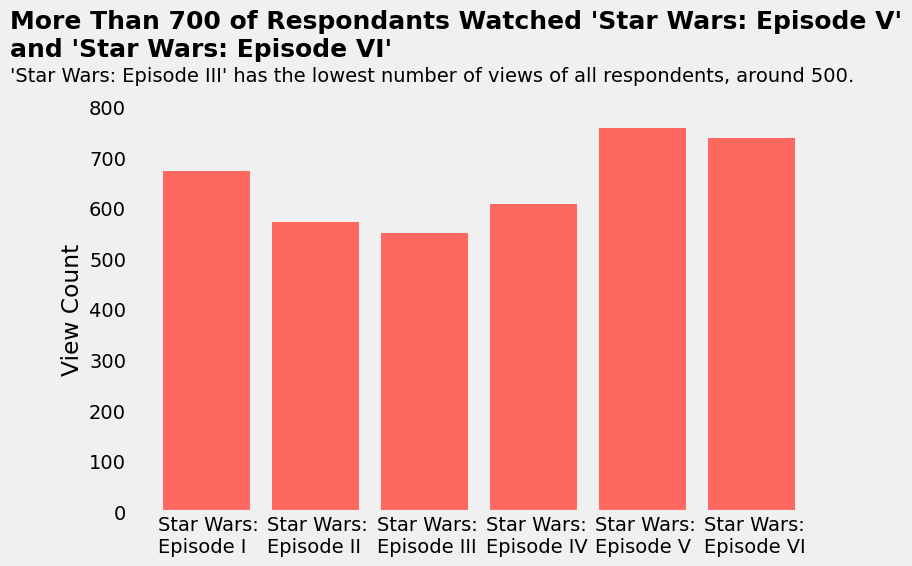

In [14]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(star_wars.columns[3:9], star_wars[star_wars.columns[3:9]].sum(), color='#FF6861')

ax.grid(visible=False)

# Title and sub-title
ax.text(-1.8, 900, 'More Than 700 of Respondants Watched \'Star Wars: Episode V\'\nand \'Star Wars: Episode VI\'',
        fontsize=18, fontweight='bold')
ax.text(-1.8, 850, '\'Star Wars: Episode III\' has the lowest number of views of all respondents, around 500.',
        fontsize=14)

# xticks
ax.set_xticklabels([])
episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
# Set custom xticks
for n, ep in enumerate(episodes):
    ax.text(-0.44 + n, -80, f'Star Wars:\nEpisode {ep}')

# yticks
ax.set_ylabel('View Count')
ax.set_ylim(0,800)

plt.show()

In the chart above, we can see that episodes five and six have the most views among those who responded to the survey. The third episode was the least viewed by respondents.

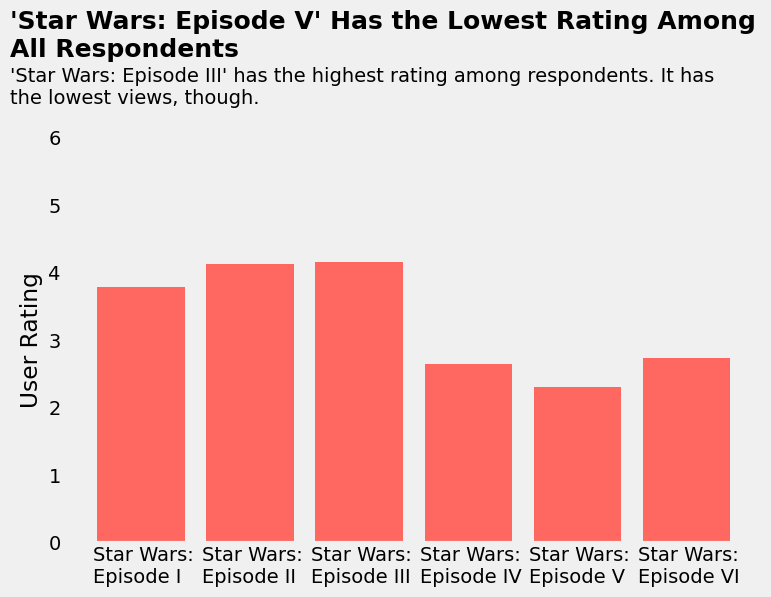

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean(), color='#FF6861')

ax.grid(visible=False)

# Title and sub-title
ax.text(-1.2, 7.2, '\'Star Wars: Episode V\' Has the Lowest Rating Among\nAll Respondents',
        fontsize=18, fontweight='bold')
ax.text(-1.2, 6.5, '\'Star Wars: Episode III\' has the highest rating among respondents. It has\nthe lowest views, though.',
        fontsize=14)

# xticks
ax.set_xticklabels([])
episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
# Set custom xticks
for n, ep in enumerate(episodes):
    ax.text(-0.44 + n, -0.6, f'Star Wars:\nEpisode {ep}')

# yticks
ax.set_ylabel('User Rating')
ax.set_ylim(0,6)

plt.show()

Based on the ratings of users who participated in the survey, the third movie is considered the best and the fifth is considered the worst.

## Explore the Responses of Various Groups of Respondents

### Watch Count and Rating Split by Gender

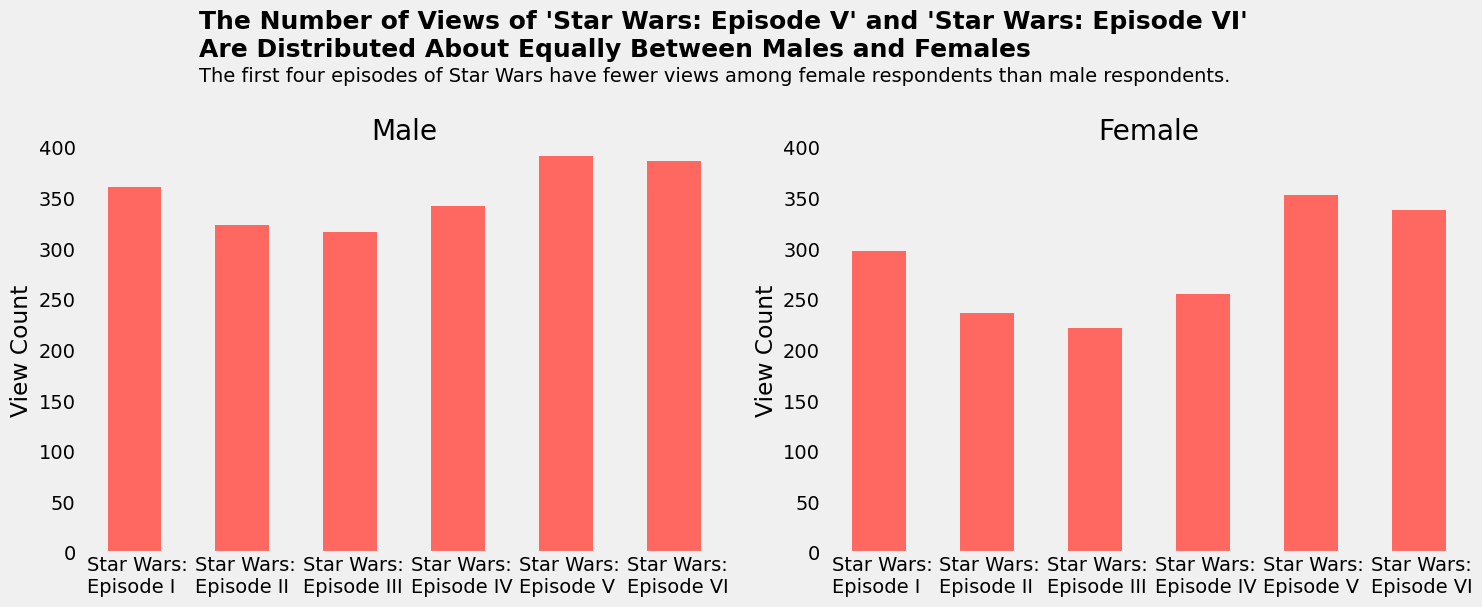

In [16]:
plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=(0.15))

for n, gen in enumerate(gender_split):
    ax = plt.subplot(1, 2, n + 1)
        
    gender_split[gen][star_wars.columns[3:9]].sum().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(gen.title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -40, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('View Count')
    ax.set_ylim(0,400)

# Fig title and sub-title
ax.text(-6.3, 490, 'The Number of Views of \'Star Wars: Episode V\' and \'Star Wars: Episode VI\'\nAre Distributed About Equally Between Males and Females',
        fontsize=18, fontweight='bold')
ax.text(-6.3, 465, 'The first four episodes of Star Wars have fewer views among female respondents than male respondents.',
        fontsize=14)
    
plt.show()

Above, we can see the number of views split by gender. We see that the number of females who watched the first four episodes is lower than the number of males. However, the number of views of the fifth and sixth episodes is not very different between females and males.

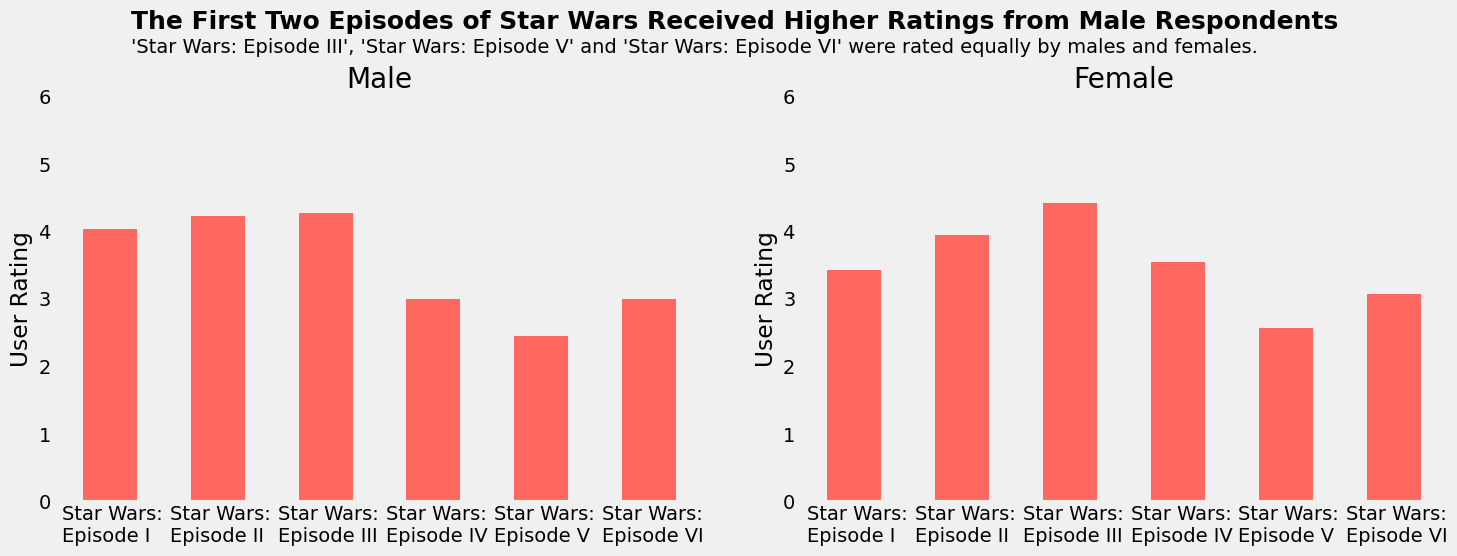

In [17]:
plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=(0.15))

for n, gen in enumerate(gender_split):
    ax = plt.subplot(1, 2, n + 1)
    
    gender_split[gen][star_wars.columns[9:15]].mean().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(gen.title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -0.6, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('User Rating')
    ax.set_ylim(0,6)

# Fig title and sub-title
ax.text(-6.7, 7, 'The First Two Episodes of Star Wars Received Higher Ratings from Male Respondents',
        fontsize=18, fontweight='bold')
ax.text(-6.7, 6.65, '\'Star Wars: Episode III\', \'Star Wars: Episode V\' and \'Star Wars: Episode VI\' were rated equally by males and females.',
        fontsize=14)
    
plt.show()

In the charts above, we can see that the first two movies were rated higher by males. The fourth movie was rated slightly higher by females. The third, fifth and sixth movies were rated equally by males and females.

### Watch Count and Rating Split by Education

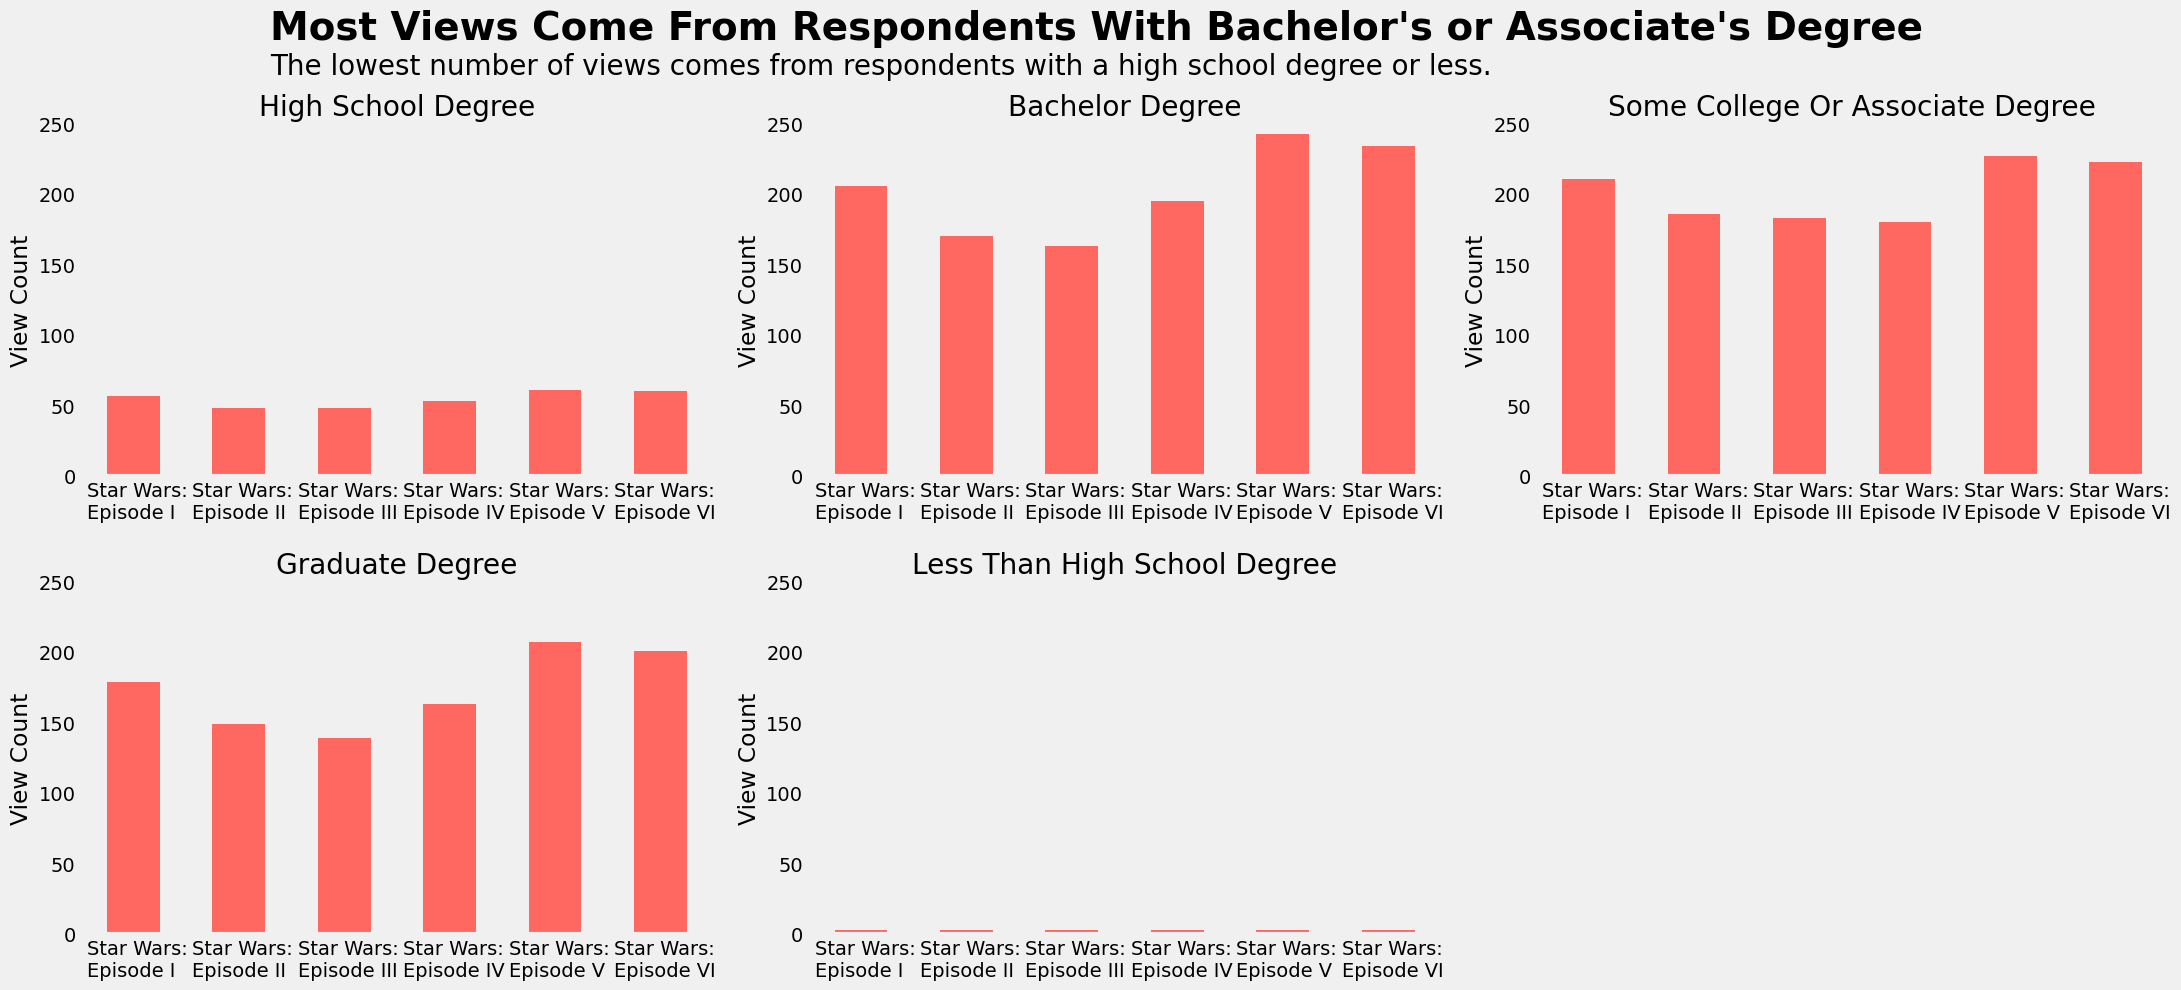

In [18]:
plt.figure(figsize=(24,10))
plt.subplots_adjust(hspace=0.3, wspace=0.15)

for n, edu in enumerate(edu_split):
    ax = plt.subplot(2, 3, n + 1)
    
    edu_split[edu][star_wars.columns[3:9]].sum().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(edu.replace('_', ' ').title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -30, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('View Count')
    ax.set_ylim(0,250)

# Fig title and sub-title
ax.text(-5.6, 635, 'Most Views Come From Respondents With Bachelor\'s or Associate\'s Degree',
        fontsize=28, fontweight='bold')
ax.text(-5.6, 610, 'The lowest number of views comes from respondents with a high school degree or less.',
        fontsize=20)

plt.show()

The chart above shows that most views come from respondents with a bachelor's or associate's degree. The least number of views comes from people with a high school or less than high school degree.

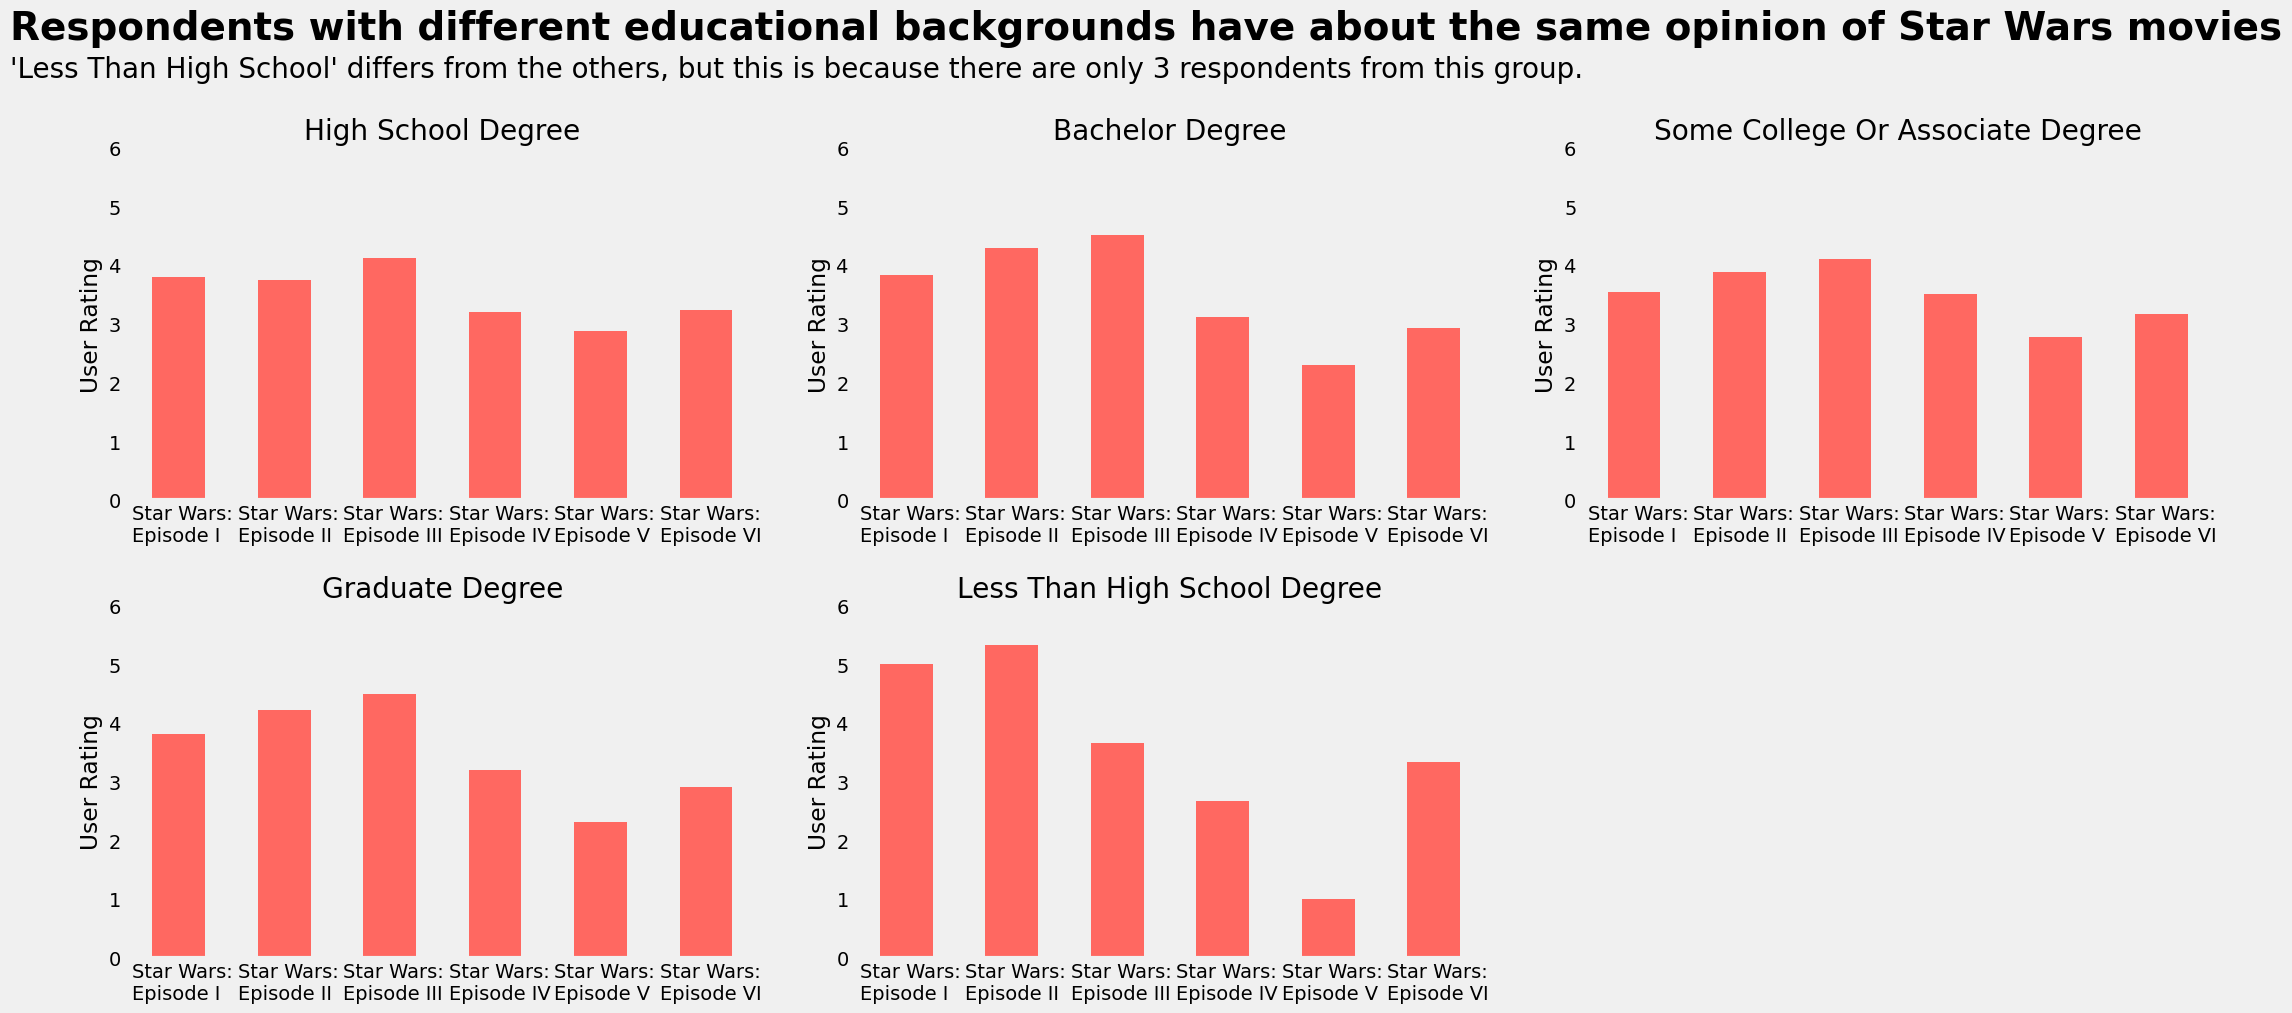

In [19]:
plt.figure(figsize=(24,10))
plt.subplots_adjust(hspace=0.3, wspace=0.15)

for n, edu in enumerate(edu_split):
    ax = plt.subplot(2, 3, n + 1)
    
    edu_split[edu][star_wars.columns[9:15]].mean().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(edu.replace('_', ' ').title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -0.7, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('User Rating')
    ax.set_ylim(0,6)

# Fig title and sub-title
ax.text(-8.5, 15.65, 'Respondents with different educational backgrounds have about the same opinion of Star Wars movies',
        fontsize=28, fontweight='bold')
ax.text(-8.5, 15, '\'Less Than High School\' differs from the others, but this is because there are only 3 respondents from this group.',
        fontsize=20)

plt.show()

The average ratings are quite similar, except for 'Less Than High School Degree', but this is due to the very small number of respondents from this group.

### Watch Count and Rating Split by Location

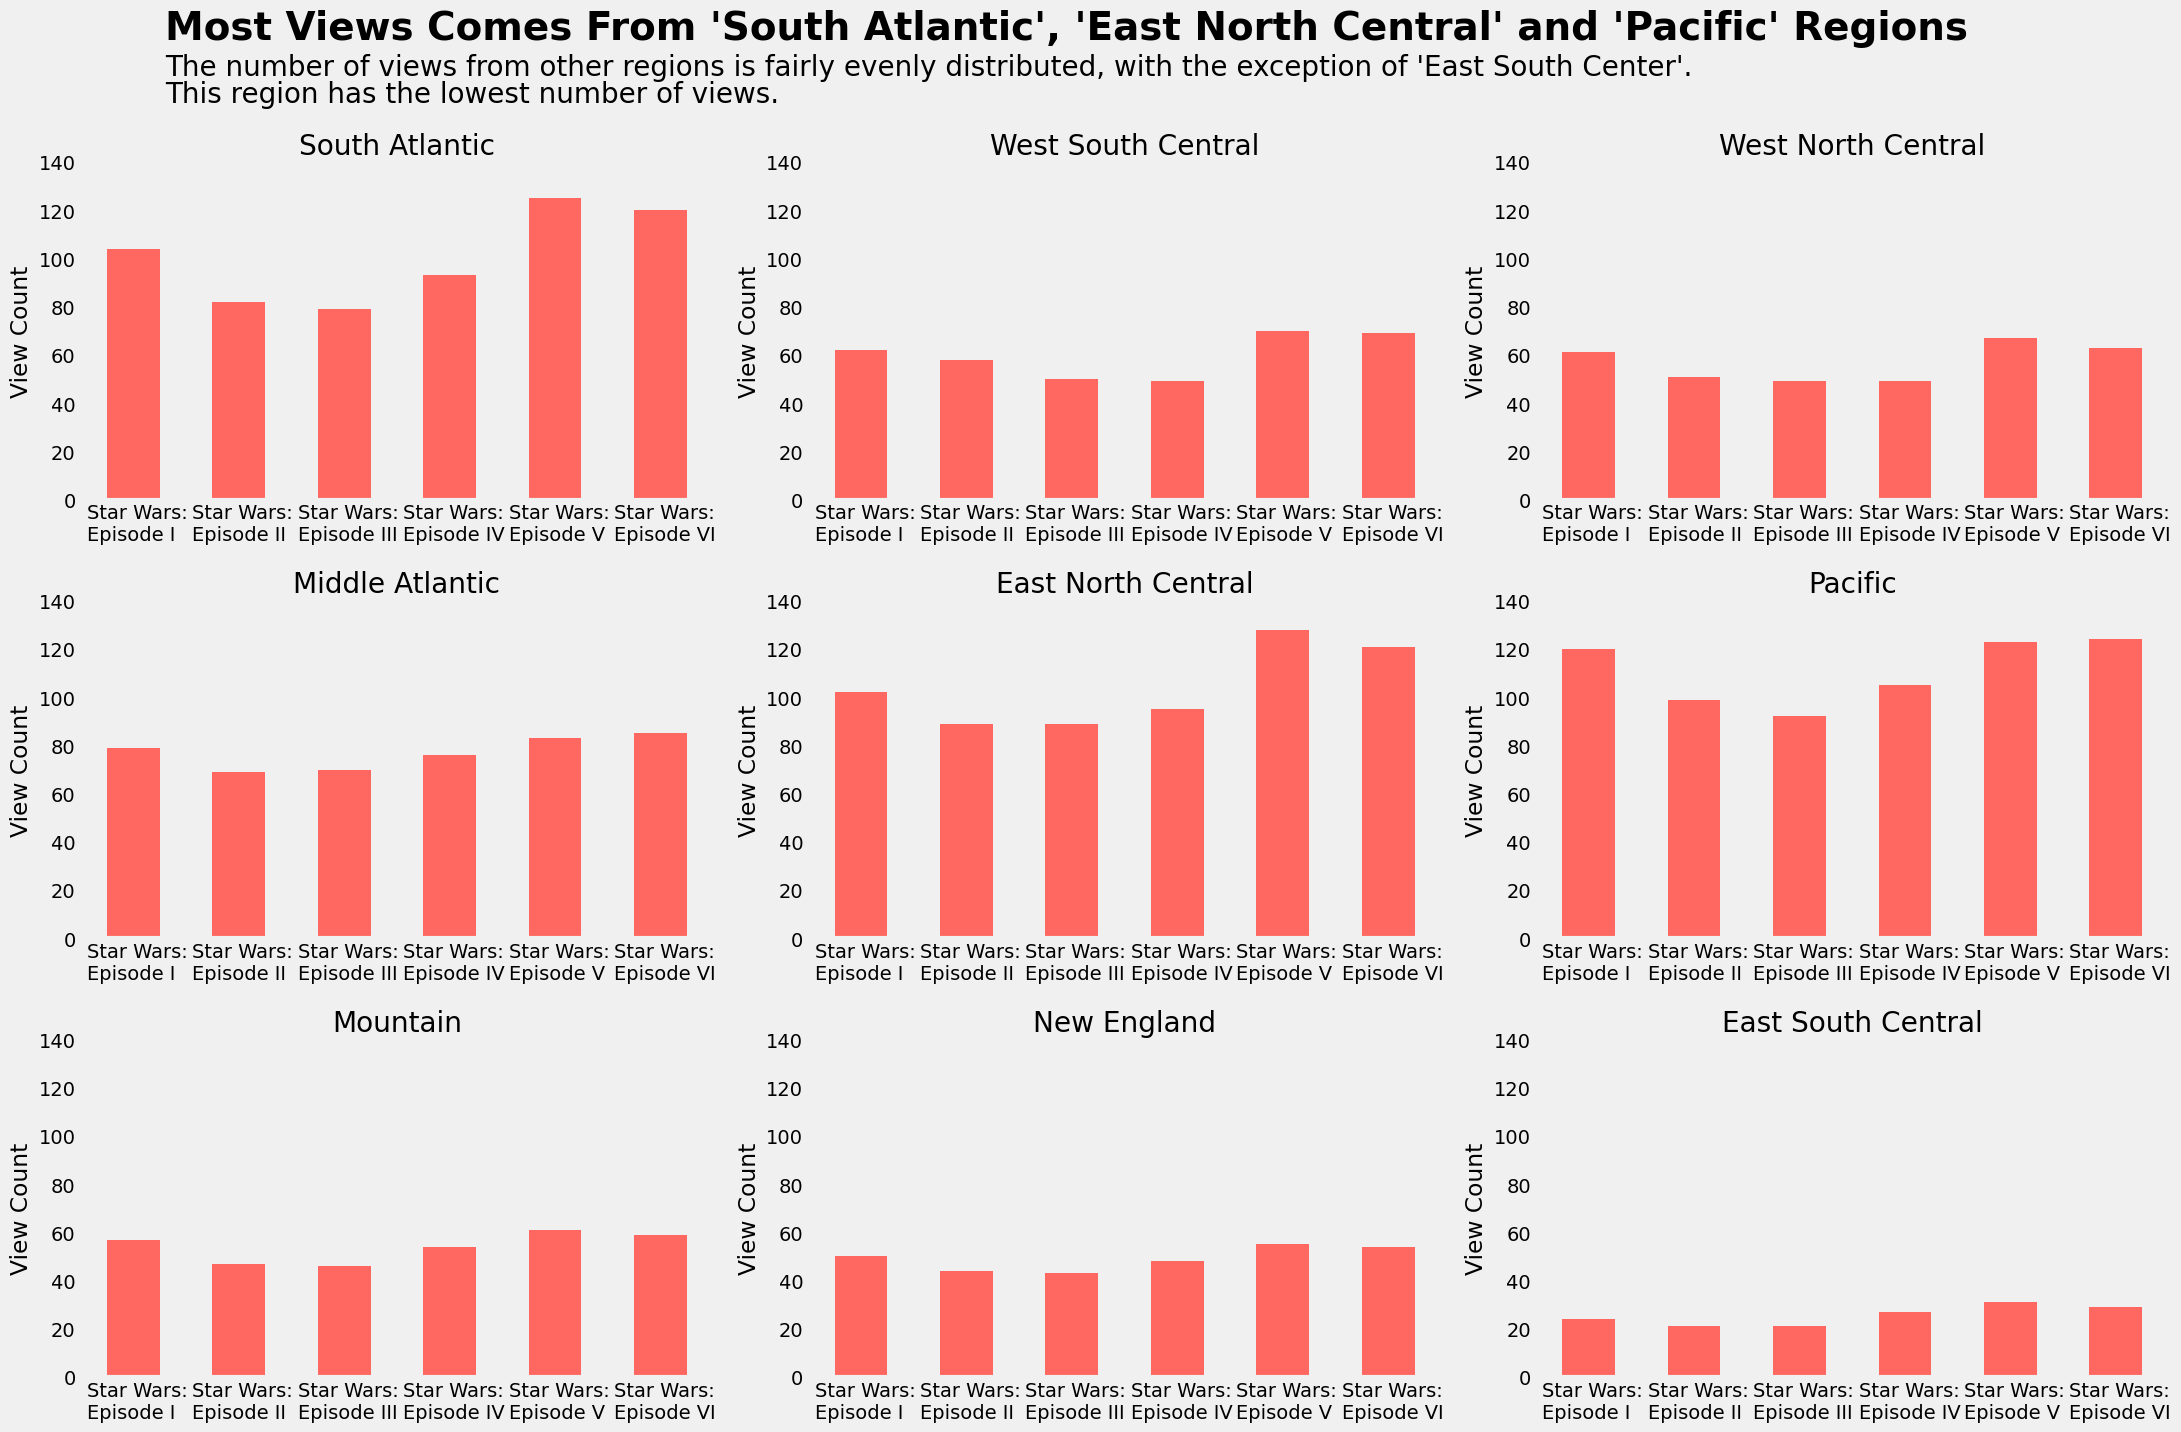

In [20]:
plt.figure(figsize=(24,15))
plt.subplots_adjust(hspace=0.3, wspace=0.15)

for n, loc in enumerate(loc_split):
    ax = plt.subplot(3, 3, n + 1)
    
    loc_split[loc][star_wars.columns[3:9]].sum().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(loc.replace('_', ' ').title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -17, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('View Count')
    ax.set_ylim(0,140)

# Fig title and sub-title
ax.text(-13.5, 555, 'Most Views Comes From \'South Atlantic\', \'East North Central\' and \'Pacific\' Regions',
        fontsize=28, fontweight='bold')
ax.text(-13.5, 540, 'The number of views from other regions is fairly evenly distributed, with the exception of \'East South Center\'.',
        fontsize=20)
ax.text(-13.5, 529, 'This region has the lowest number of views.',
       fontsize=20)
    
plt.show()

By looking at the chart above, we can see that most of the views come from these regions: `South Atlantic`, `East North Central` and `Pacific`. The lowest number of views comes from `East South Central`. The number of views from the other regions is distributed fairly equally.

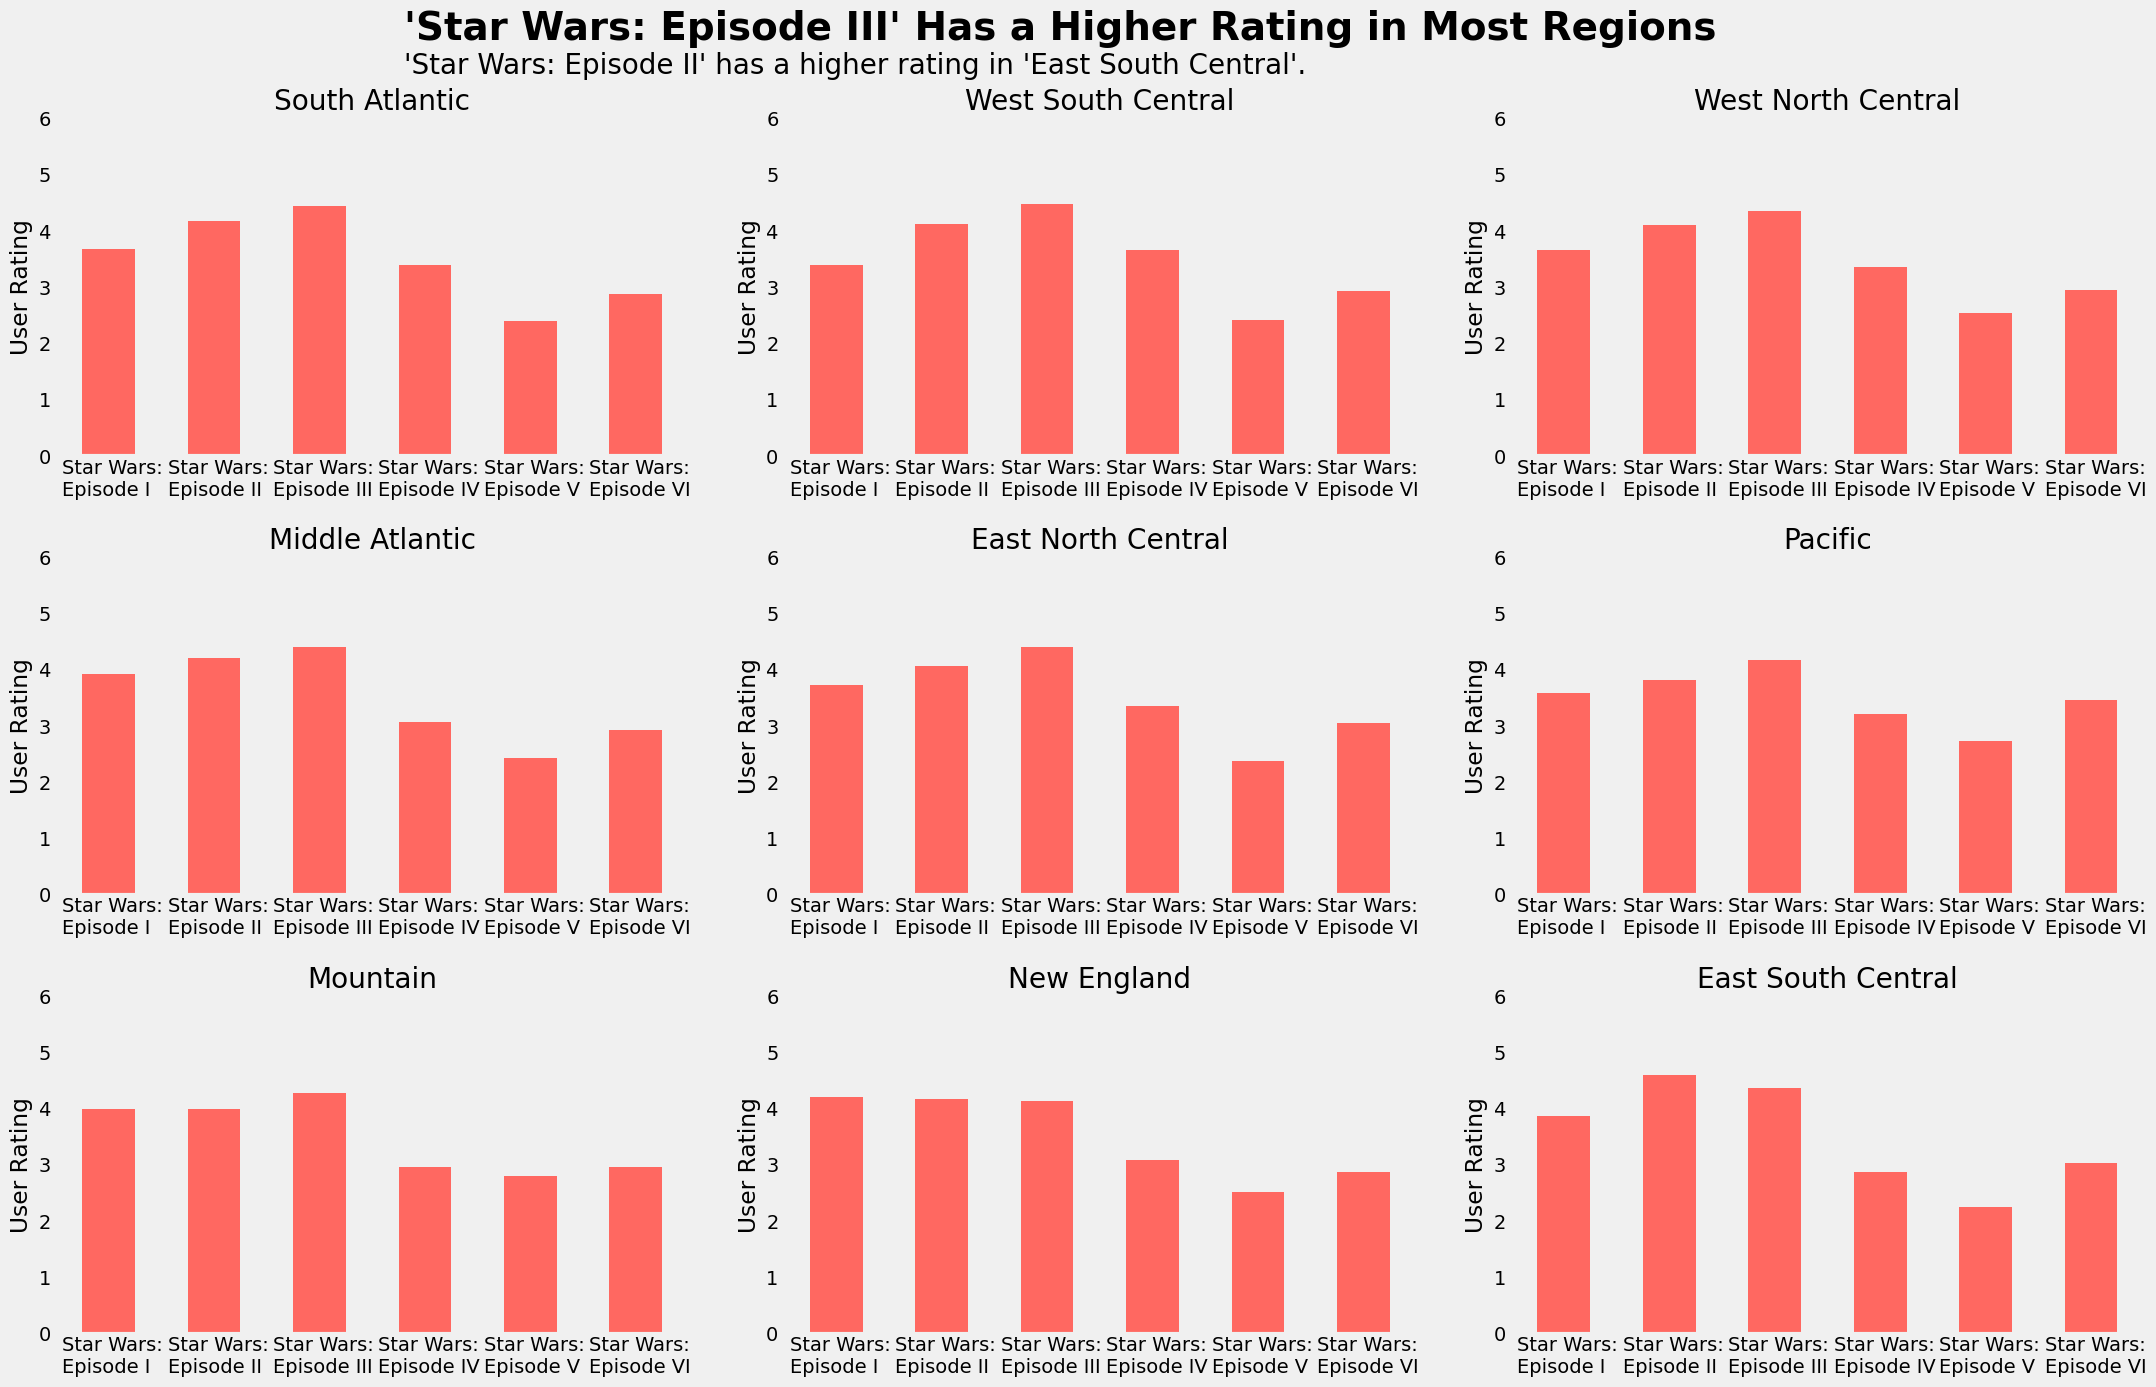

In [21]:
plt.figure(figsize=(24,15))
plt.subplots_adjust(hspace=0.3, wspace=0.15)

for n, loc in enumerate(loc_split):
    ax = plt.subplot(3, 3, n + 1)
    
    loc_split[loc][star_wars.columns[9:15]].mean().plot.bar(ax=ax, color='#FF6861')
    
    ax.grid(visible=False)
    
    # Plot title
    ax.set_title(loc.replace('_', ' ').title())
    
    # xticks
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels([])
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    # Set custom xticks
    for n, ep in enumerate(episodes):
        ax.text(-0.44 + n, -0.7, f'Star Wars:\nEpisode {ep}')
    
    # yticks
    ax.set_ylabel('User Rating')
    ax.set_ylim(0,6)

# Fig title and sub-title
ax.text(-11, 23, '\'Star Wars: Episode III\' Has a Higher Rating in Most Regions',
        fontsize=28, fontweight='bold')
ax.text(-11, 22.4, '\'Star Wars: Episode II\' has a higher rating in \'East South Central\'.',
        fontsize=20)
    
plt.show()

In the chart above, we can see that the third episode of Star Wars has a higher rating in most regions. However, in `East South Central`, the second episode of Star Wars has a higher rating.

## Explore How Favorably Respondents View the Characters

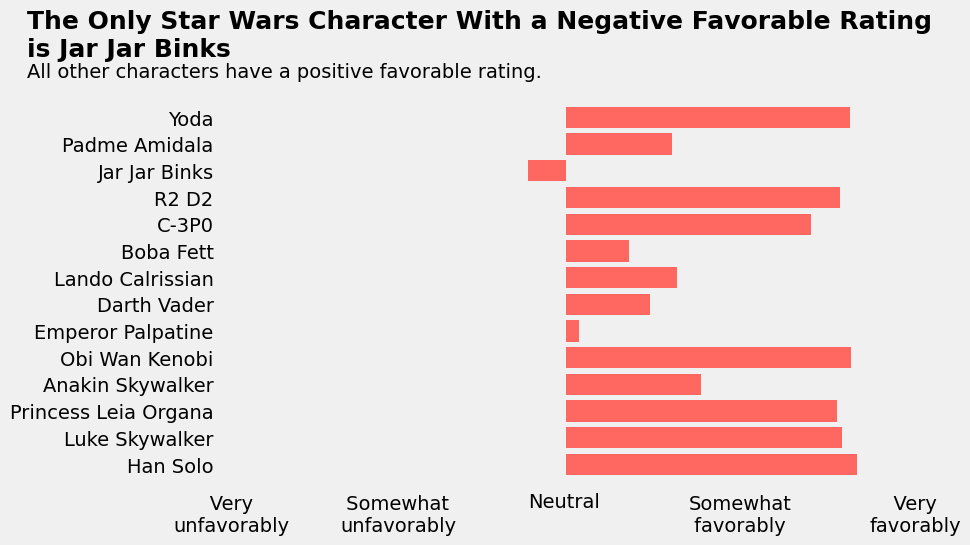

In [22]:
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(star_wars.columns[15:29], star_wars[star_wars.columns[15:29]].mean(), color='#FF6861')

ax.grid(visible=False)

# Title and sub-title
ax.text(-15.5, 15.3, 'The Only Star Wars Character With a Negative Favorable Rating\nis Jar Jar Binks',
        fontsize=18, fontweight='bold')
ax.text(-15.5, 14.5, 'All other characters have a positive favorable rating.',
        fontsize=14)

# xticks
ax.set_xticklabels([])
# Custom xticks
ax.text(8.7, -2.5, '    Very\nfavorably')
ax.text(3.5, -2.5, 'Somewhat\n favorably')
ax.text(-1.1, -1.63, 'Neutral')
ax.text(-6.5, -2.5, ' Somewhat\nunfavorably')
ax.text(-11.3, -2.5, '      Very\nunfavorably')

ax.set_xlim(-10,10)

plt.show()

We can see here that the top three most favorable Star Wars characters are Han Solo, Obi Wan Kenobi and Yoda. The least favorable character is Jar Jar Binks. The most controversial character in Star Wars movies is Emperor Palpatine.

<a id='conclusion'></a>
# Conclusion

Our main goal was to answer the following question, 'Which Star Wars movie is the best?'.

Here's what we found:
* 'Star Wars: Episode III' - the best episode according to survey results.
* 'Star Wars: Episode V' - the worst episode according to survey results.
* The final average scores of the movies are almost unaffected by the distribution of respondents into different groups.

We also explore how favorably respondents view the characters and here's what we found:
* Top three most favorable Star Wars characters are Han Solo, Obi Wan Kenobi and Yoda.
* Jar Jar Binks is the least favorable character.
* Emperor Palpatine is the most controversial character.